In [1]:
!ls /scratch/tanhuanp/n_track_ML/output/log/shap_best_adam_all_20230824b
!ls /scratch/tanhuanp/n_track_ML/output/InceptionTime | wc -l
#!ls /scratch/tanhuanp/n_track_ML/output/cross-validation/shap_best_adam_all_20230824b/202308241620/


202308241620
40


In [2]:
#!ls -lrt /scratch/tanhuanp/n_track_ML/output/shap/
!ls /scratch/tanhuanp/n_track_ML/output/shap/

shap_best_adam_all_20230824  shap_best_adam_all_20230824b


In [3]:
#!ls -lrt /scratch/tanhuanp/n_track_ML/output/shap/shap_best_adam_all_20230824b
#!ls /scratch/tanhuanp/n_track_ML/output/shap/shap_best_adam_all_20230824b
!ls /scratch/tanhuanp/n_track_ML/output/shap/shap_best_adam_all_20230824b/202308241620
!ls /scratch/tanhuanp/n_track_ML/output/shap/shap_best_adam_all_20230824b/202308241620 | wc -l 
!ls /scratch/tanhuanp/n_track_ML/output/shap/shap_best_adam_all_20230824b/202308241620/18297705

18297705  18297708  18297711  18297714	18297717  18297720  18297723
18297706  18297709  18297712  18297715	18297718  18297721  18297724
18297707  18297710  18297713  18297716	18297719  18297722
20
features.npy	   list_idx_test.npy   list_shap_deep.npy  list_X_test.npy
list_accuracy.npy  list_idx_train.npy  list_shap_grad.npy


In [4]:
import numpy as np
from pathlib import Path
import os 

# stored SHAP values from 21 repetitions
output_shap = Path('/scratch/tanhuanp/n_track_ML/output/shap/shap_best_adam_all_20230824b/202308241620')
repetitions = os.listdir(output_shap)
repetition0 = repetitions[0]
print(repetitions)

['18297715', '18297721', '18297719', '18297706', '18297709', '18297707', '18297724', '18297710', '18297722', '18297708', '18297723', '18297713', '18297711', '18297716', '18297720', '18297712', '18297717', '18297718', '18297714', '18297705']


In [5]:
# each subdirectory contains lists with 4 cross-validation runs
os.listdir(output_shap / repetition0)

['features.npy',
 'list_accuracy.npy',
 'list_idx_train.npy',
 'list_shap_grad.npy',
 'list_idx_test.npy',
 'list_X_test.npy',
 'list_shap_deep.npy']

In [6]:
def load_shap_values(output_shap):
    list_idx_train = np.load(output_shap / 'list_idx_train.npy', allow_pickle=True)
    list_idx_test = np.load(output_shap / 'list_idx_test.npy', allow_pickle=True)
    list_X_test = np.load(output_shap / 'list_X_test.npy', allow_pickle=True)
    list_shap_deep = np.load(output_shap / 'list_shap_deep.npy', allow_pickle=True)
    list_shap_grad = np.load(output_shap / 'list_shap_grad.npy', allow_pickle=True)
    list_acc = np.load(output_shap / 'list_accuracy.npy', allow_pickle=True)
    features = np.load(output_shap / 'features.npy', allow_pickle=True)
    
    return list_idx_train, list_idx_test, list_X_test, list_shap_deep, list_shap_grad, list_acc, features

In [7]:
list_idx_train, list_idx_test, list_X_test, list_shap_deep, list_shap_grad, list_accuracy, features =\
load_shap_values(output_shap / repetition0)

print(list_accuracy.mean())
print(list_accuracy.shape)
print(list_idx_test.shape)
print(list_idx_test[0].shape)
#print(list_idx_test[0])
print(list_shap_deep.shape)
print(list_shap_deep[0].shape)
#print(list_shap_deep[0][0])


0.5848078386605784
(4,)
(4,)
(72,)
(4,)
(72, 28, 5)


In [8]:
# combine all repetitions
lists_idx_test = []
lists_X_test = []
lists_shap_deep = []
lists_shap_grad = []
lists_acc = []
for r in os.listdir(output_shap):
    output = output_shap / r
    
    list_idx_train, list_idx_test, list_X_test, list_shap_deep, list_shap_grad, list_acc, features =\
    load_shap_values(output)

    lists_idx_test.extend(list_idx_test)
    lists_X_test.extend(list_X_test)
    lists_shap_deep.extend(list_shap_deep)
    lists_shap_grad.extend(list_shap_grad)
    lists_acc.append(list_acc)
    
    #print(r)
    #print(np.mean(list_acc))
    #print(list_acc.shape)
    
list_idx_test = np.concatenate(lists_idx_test)
list_X_test = np.concatenate(lists_X_test)
list_shap_deep = np.concatenate(lists_shap_deep)
list_shap_grad = np.concatenate(lists_shap_grad)

list_acc = np.concatenate(lists_acc)
print(list_acc.shape)
print(np.mean(list_acc))


(80,)
0.5758040744596326


In [9]:
print(list_idx_test.shape)
print(list_X_test.shape)
print(list_shap_deep.shape)
print(list_shap_grad.shape)


(5780,)
(5780, 28, 5)
(5780, 28, 5)
(5780, 28, 5)


In [10]:
list_idx_test

array([  4,   5,   8, ..., 276, 281, 283])

In [11]:
unique, counts = np.unique(list_idx_test, return_counts=True)
print(len(unique))
print(min(unique))
counts

289
0


array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20

In [12]:
list_shap_deep[:,0,0]

array([ 0.00616787, -0.06967973,  0.00152207, ...,  0.00165931,
        0.00199   ,  0.00203368])

In [13]:
# pick repetitions of a single instance (time series)
idx_1 = list_idx_test==1
shap_1 = list_shap_deep[idx_1] 
print(shap_1.shape)

# average over repetitions and timepoint (leaves features)
np.mean(shap_1, axis=(0,1))

(20, 28, 5)


array([ 0.0020725 ,  0.00132961,  0.00145279, -0.00157931, -0.00116448])

In [14]:
X_test_f = []
shap_deep_f = []
shap_grad_f = []
# loop over instances
for i in range(len(unique)):
    #print(i)
    idx_i = list_idx_test==i
    X_test_i = list_X_test[idx_i]
    shap_deep_i = list_shap_deep[idx_i]
    shap_grad_i = list_shap_grad[idx_i]
    # average over repetitions and time steps
    X_test_f.append(np.mean(X_test_i, axis=(0,1)))
    shap_deep_f.append(np.mean(shap_deep_i, axis=(0,1)))
    shap_grad_f.append(np.mean(shap_grad_i, axis=(0,1)))
    
X_test_f = np.array(X_test_f)
shap_deep_f = np.array(shap_deep_f)
shap_grad_f = np.array(shap_grad_f)

#X_test_f = np.concatenate(X_test_f, axis=0)
#shap_deep_f = np.concatenate(shap_deep_f, axis=0)
#shap_grad_f = np.concatenate(shap_grad_f, axis=0)

print(X_test_f.shape)
print(shap_deep_f.shape)
print(shap_grad_f.shape)


(289, 5)
(289, 5)
(289, 5)


In [15]:
X_test_f[:5]

array([[ 3.24527528, -0.39807546,  0.37472466, -1.30107697,  0.299444  ],
       [ 2.36515447, -0.39807546,  0.37472466,  0.5799637 ,  0.03282607],
       [ 1.01497432,  1.06918125,  0.62706687,  2.81467984,  0.19662749],
       [ 0.61239331,  1.06918125,  0.62706687,  2.5562934 , -0.16044559],
       [ 0.03809397, -0.57144043, -0.70319132, -0.93788191, -0.10490903]])

In [16]:
shap_deep_f[:5]

array([[ 0.00485738,  0.00049771, -0.00165593, -0.00356347,  0.000832  ],
       [ 0.0020725 ,  0.00132961,  0.00145279, -0.00157931, -0.00116448],
       [-0.00463206,  0.00615483, -0.00075919,  0.00618138, -0.00070133],
       [-0.00215314,  0.00237561, -0.00117219,  0.00895801, -0.00069911],
       [ 0.00306139, -0.00630908,  0.00014971, -0.00050228, -0.00020545]])

In [17]:
!python -m pip install shap==0.41.0

Defaulting to user installation because normal site-packages is not writeable


In [18]:
!pip list |grep shap

shap                          0.41.0


In [19]:
import pandas as pd
import shap

#from load_data_tsc import fsets

# feature sets
# 'file' is included because it is needed to create groups
fsets = {}
fs = ['file', 'serum']
fsets['D'] =             fs + ['D']
fsets['D_Dist'] =        fs + ['D', 'Dist']
fsets['D_A_P'] =         fs + ['D', 'A', 'P']
fsets['D_t'] =           fs + ['D', 't']
fsets['D_t_dt'] =        fs + ['D', 'dt']
fsets['D_Dist_t_dt_A'] = fs + ['D', 'Dist', 't','dt', 'A']
fsets['all'] =           fs + ['D', 'A', 'P', 'Dist', 'dt']

features = fsets['all'][2:]
print(features)

['D', 'A', 'P', 'Dist', 'dt']


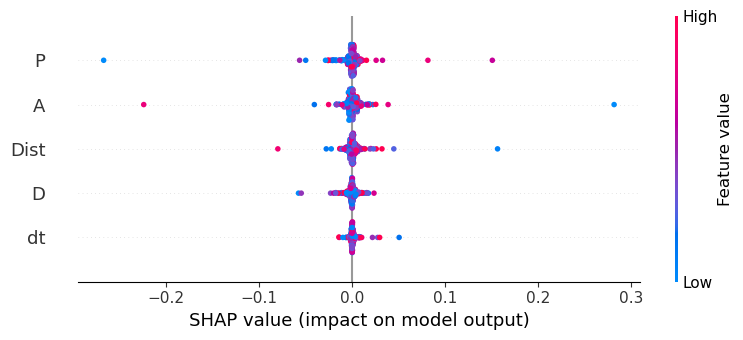

In [20]:
import matplotlib.pyplot as plt 

X_test_f = pd.DataFrame(X_test_f, columns=features)

shap.summary_plot(shap_deep_f, features=X_test_f, title='DeepExplainer')


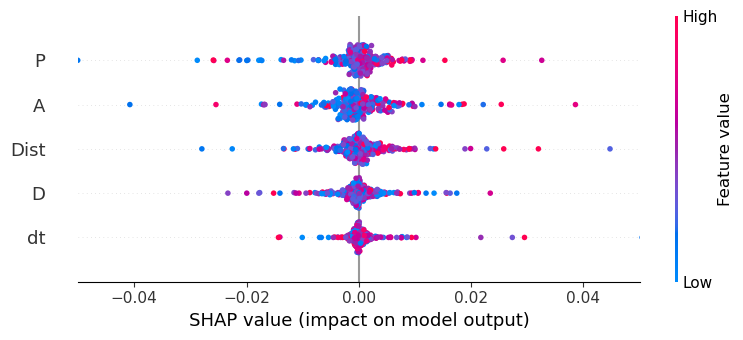

In [21]:
shap.summary_plot(shap_deep_f, features=X_test_f, title='DeepExplainer, xlim', show=False)
ax = plt.gca()

# You can change the min and max value of xaxis by changing the arguments of:
ax.set_xlim(-0.05, 0.05) 
plt.show()

'''
in InceptionTime repository 
classifiers/inception.py

in line 90:
output_layer = keras.layers.Dense(nb_classes, activation='softmax')(gap_layer)
where (according to dense layer docs) the first argument must be units (nb_classes passed?) = Positive integer, dimensionality of the output space.
So my gut feeling is that the last layer of InceptionTime might output 2 dimensions instead of one

=> DeepExplainer has to be ignored for InceptionTime in our case
'''

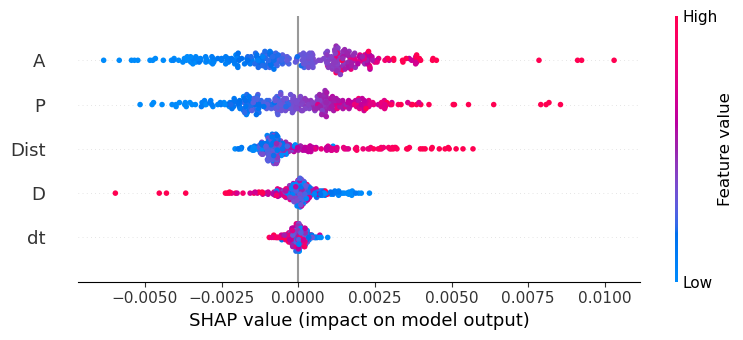

In [22]:
shap.summary_plot(shap_grad_f, features=X_test_f, title='GradientExplainer')

In [23]:
# Generating figure 2f
# no access to epochs before 100

!head -n 20 /scratch/tanhuanp/n_track_ML/output/cross-validation/shap_best_adam_all_20230824b/202308241620/cv_shap_best_adam_all_20230824b_k3_14_28_e100_202308241620.csv
adam_lrn = pd.read_csv('/scratch/tanhuanp/n_track_ML/output/cross-validation/shap_best_adam_all_20230824b/202308241620/cv_shap_best_adam_all_20230824b_k3_14_28_e100_202308241620.csv')
adam_lrn.head()

accuracy,precision,recall,f1,repeat,cv,classifier,fset,kernel_size,epochs,job_id
0.5857142857142857,0.65,0.6341463414634146,0.6419753086419754,1.0,"StratifiedGroupKFold(n_splits=4, random_state=None, shuffle=True)",InceptionTime,all,3_14_28,100,18297722
0.5866666666666667,0.4791666666666667,0.7931034482758621,0.5974025974025974,1.0,"StratifiedGroupKFold(n_splits=4, random_state=None, shuffle=True)",InceptionTime,all,3_14_28,100,18297722
0.5915492957746479,0.7,0.5121951219512195,0.5915492957746479,1.0,"StratifiedGroupKFold(n_splits=4, random_state=None, shuffle=True)",InceptionTime,all,3_14_28,100,18297722
0.5753424657534246,0.6896551724137931,0.47619047619047616,0.5633802816901408,1.0,"StratifiedGroupKFold(n_splits=4, random_state=None, shuffle=True)",InceptionTime,all,3_14_28,100,18297722


,accuracy,precision,recall,f1,repeat,cv,classifier,fset,kernel_size,epochs,job_id
0,0.585714,0.650000,0.634146,0.641975,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,100,18297722
1,0.586667,0.479167,0.793103,0.597403,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,100,18297722
2,0.591549,0.700000,0.512195,0.591549,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,100,18297722
3,0.575342,0.689655,0.476190,0.563380,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,100,18297722


In [24]:
# Generating figure 2g

#!python -m pip install seaborn

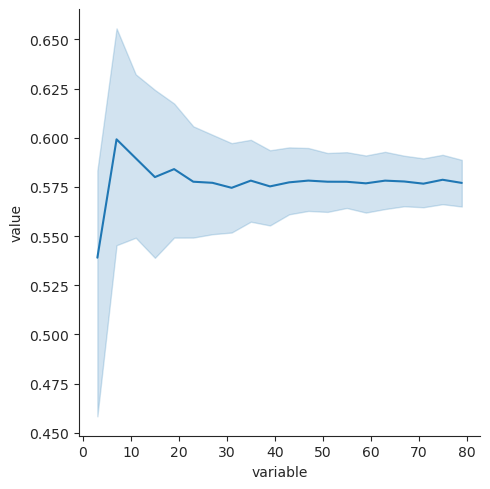

In [25]:
#print (list_acc)
#len(list_acc)
import seaborn as sns
from matplotlib import pyplot as plt, rcParams
#rcParams['figure.dpi'] = 300 # uncomment for pub image
rcParams.update({'figure.autolayout': True})

list_acc = pd.Series(list_acc)
#type(list_acc)
acc_df = pd.DataFrame()
for i in reversed(range(3, len(list_acc), 4)):
    acc_df[i] = list_acc[:i]

acc_df_long = acc_df.melt()
sns.set_style(style='ticks')
sns.relplot(data=acc_df_long.dropna(), kind='line', x='variable', y='value')
#plt.gcf().set_size_inches(4, 3.5) # uncomment for pub image
plt.show()

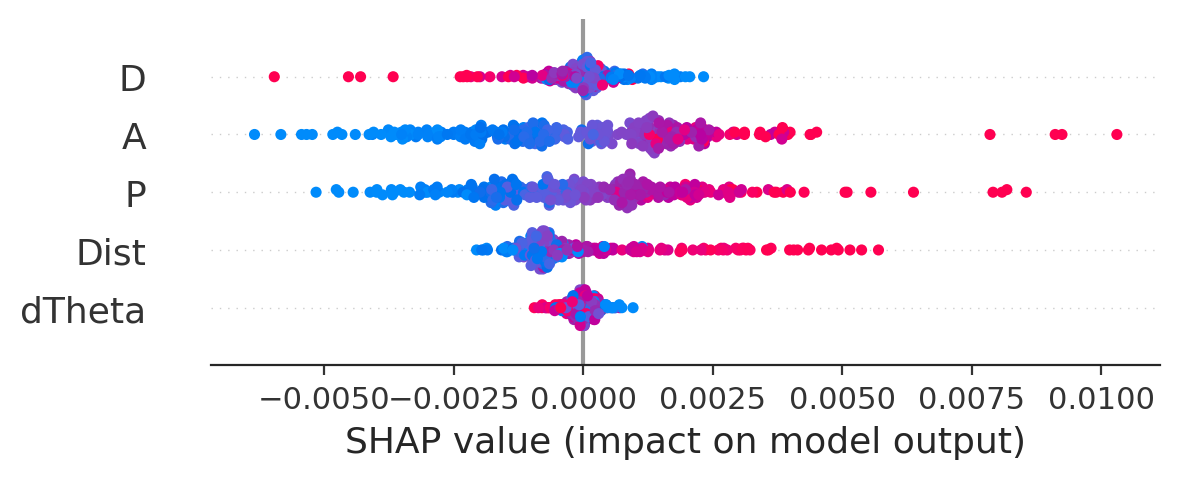

In [32]:
# Generating figure 3f (SHAP summary plot for InceptionTime)

def sh_plot(shap_values, feature_values, feature_names):
    shap.summary_plot(shap_values,
                      feature_values,
                      feature_names=feature_names,
                      sort=False,
                      color_bar=False,
                      plot_size=(10, 6),
                      show=False,
                      )
rcParams.update({'figure.autolayout': True})
rcParams['figure.dpi'] = 200
sh_plot(shap_grad_f, X_test_f, ['D', 'A', 'P', 'Dist', 'dTheta'])
plt.gcf().set_size_inches(6, 2.5)

# TODO format
# TODO dependence
# TODO interactions

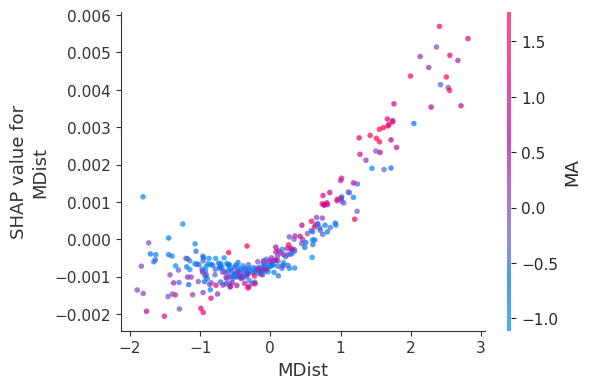

In [36]:
def sh_dep_plot(feature, shap_values, feature_values, fnames, color):
    shap.dependence_plot(feature,
                         shap_values,
                         feature_values,
                         fnames,
                         interaction_index=color,
                         show=False,
                         alpha=0.7,
                         )

list1 = [('MDist', 'MA')]    
fnames = ['MD', 'MA', 'MP', 'MDist', 'Pers']

for i in list1:
    sh_dep_plot(i[0], shap_grad_f, X_test_f, fnames, i[1])
    #rcParams['figure.dpi'] = 200
    #plt.xlim(-2.1, 3.1)
    #plt.ylim(-0.0074, 0.0055)
    plt.gcf().set_size_inches(6, 4)
    plt.show()
    plt.close()
    

In [28]:
# aprroximation of feature interactions

def approximate_interactions(index, shap_values, X, feature_names=None):
    # that's from shap utils https://github.com/slundberg/shap/blob/master/shap/utils/_general.py

    """ Order other features by how much interaction they seem to have with the feature at the given index.
    This just bins the SHAP values for a feature along that feature's value. For true Shapley interaction
    index values for SHAP see the interaction_contribs option implemented in XGBoost.
    """
    # convert from DataFrames if we got any
    if str(type(X)).endswith("'pandas.core.frame.DataFrame'>"):
        if feature_names is None:
            feature_names = X.columns
        X = X.values
    index = convert_name(index, shap_values, feature_names)
    if X.shape[0] > 10000:
        a = np.arange(X.shape[0])
        np.random.shuffle(a)
        inds = a[:10000]
    else:
        inds = np.arange(X.shape[0])
    x = X[inds, index]
    srt = np.argsort(x)
    shap_ref = shap_values[inds, index]
    shap_ref = shap_ref[srt]
    inc = max(min(int(len(x) / 10.0), 50), 1)
    interactions = []
    for i in range(X.shape[1]):
        encoded_val_other = encode_array_if_needed(X[inds, i][srt], dtype=np.float)
        val_other = encoded_val_other
        v = 0.0
        if not (i == index or np.sum(np.abs(val_other)) < 1e-8):
            for j in range(0, len(x), inc):
                if np.std(val_other[j:j + inc]) > 0 and np.std(shap_ref[j:j + inc]) > 0:
                    v += abs(np.corrcoef(shap_ref[j:j + inc], val_other[j:j + inc])[0, 1])
        val_v = v
        val_other = np.isnan(encoded_val_other)
        v = 0.0
        if not (i == index or np.sum(np.abs(val_other)) < 1e-8):
            for j in range(0, len(x), inc):
                if np.std(val_other[j:j + inc]) > 0 and np.std(shap_ref[j:j + inc]) > 0:
                    v += abs(np.corrcoef(shap_ref[j:j + inc], val_other[j:j + inc])[0, 1])
        nan_v = v
        interactions.append(max(val_v, nan_v))
    return np.argsort(-np.abs(interactions)), np.abs(interactions)


def convert_name(ind, shap_values, input_names):
    # that's from shap utils https://github.com/slundberg/shap/blob/master/shap/utils/_general.py
    if type(ind) == str:
        nzinds = np.where(np.array(input_names) == ind)[0]
        if len(nzinds) == 0:
            # we allow rank based indexing using the format "rank(int)"
            if ind.startswith("rank("):
                return np.argsort(-np.abs(shap_values).mean(0))[int(ind[5:-1])]
            # we allow the sum of all the SHAP values to be specified with "sum()"
            # assuming here that the calling method can deal with this case
            elif ind == "sum()":
                return "sum()"
            else:
                raise ValueError("Could not find feature named: " + ind)
        else:
            return nzinds[0]
    else:
        return ind


def encode_array_if_needed(arr, dtype=np.float64):
    # that's from shap utils https://github.com/slundberg/shap/blob/master/shap/utils/_general.py
    try:
        return arr.astype(dtype)
    except ValueError:
        unique_values = np.unique(arr)
        encoding_dict = {string: index for index, string in enumerate(unique_values)}
        encoded_array = np.array([encoding_dict[string] for string in arr], dtype=dtype)
        return encoded_array



`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: htt

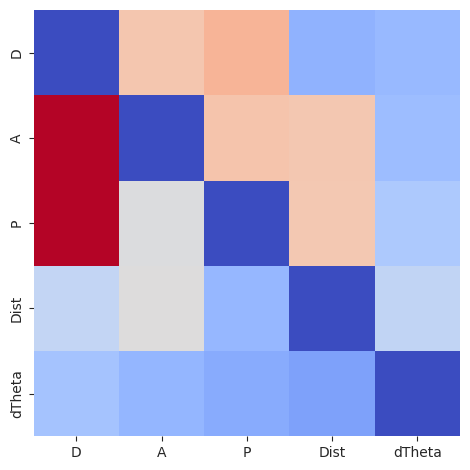

In [37]:
inters_rank = pd.DataFrame()
inters = pd.DataFrame()



# number here represents feature index in feature_list, row index - rank in importance
for i in ['D', 'A', 'P', 'Dist', 'dTheta']:
    intrs = approximate_interactions(index=i, shap_values=shap_grad_f, X=X_test_f,
                                     feature_names=['D', 'A', 'P', 'Dist', 'dTheta'])

    inters[i] = intrs[1]
    inters_rank[i] = intrs[0]

inters.index = ['D', 'A', 'P', 'Dist', 'dTheta']

sns.heatmap(inters, annot=False, square=True, cbar=False, cmap='coolwarm')
plt.show()
plt.close()


In [38]:
#𝐀si = 0.5(𝐀i+𝐀it)

inters = (inters+inters.T)/2
inters

,D,A,P,Dist,dTheta
D,0.000000,5.960468,6.185884,2.461552,2.217662
A,5.960468,0.000000,4.135203,4.128576,2.093499
P,6.185884,4.135203,0.000000,3.277999,2.135029
Dist,2.461552,4.128576,3.277999,0.000000,2.258814
dTheta,2.217662,2.093499,2.135029,2.258814,0.000000


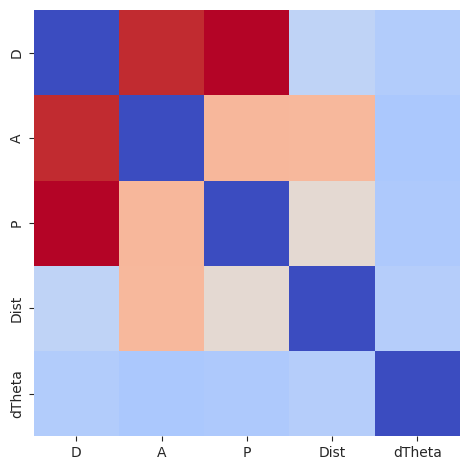

In [39]:
sns.heatmap(inters, annot=False, square=True, cbar=False, cmap='coolwarm')
plt.show()
plt.close()
